In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/game-of-thrones/character-predictions.csv
/kaggle/input/game-of-thrones/battles.csv
/kaggle/input/game-of-thrones/character-deaths.csv


In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/game-of-thrones/character-predictions.csv')
df.head().T

,0,1,2,3,4
S.No,1,2,3,4,5
actual,0,1,1,0,1
pred,0,0,0,0,1
alive,0.054,0.387,0.493,0.076,0.617
plod,0.946,0.613,0.507,0.924,0.383
name,Viserys II Targaryen,Walder Frey,Addison Hill,Aemma Arryn,Sylva Santagar
title,NaN,Lord of the Crossing,Ser,Queen,Greenstone
male,1,1,1,0,0
culture,NaN,Rivermen,NaN,NaN,Dornish
dateOfBirth,NaN,208.0,NaN,82.0,276.0


In [4]:
df.shape

(1946, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   actual             1946 non-null   int64  
 2   pred               1946 non-null   int64  
 3   alive              1946 non-null   float64
 4   plod               1946 non-null   float64
 5   name               1946 non-null   object 
 6   title              938 non-null    object 
 7   male               1946 non-null   int64  
 8   culture            677 non-null    object 
 9   dateOfBirth        433 non-null    float64
 10  DateoFdeath        444 non-null    float64
 11  mother             21 non-null     object 
 12  father             26 non-null     object 
 13  heir               23 non-null     object 
 14  house              1519 non-null   object 
 15  spouse             276 non-null    object 
 16  book1              1946 

In [6]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
S.No,1946.0,973.500000,561.906131,1.0,487.250000,973.500000,1459.750000,1946.0
actual,1946.0,0.745632,0.435617,0.0,0.000000,1.000000,1.000000,1.0
pred,1946.0,0.687050,0.463813,0.0,0.000000,1.000000,1.000000,1.0
alive,1946.0,0.634470,0.312637,0.0,0.391250,0.735500,0.899000,1.0
plod,1946.0,0.365530,0.312637,0.0,0.101000,0.264500,0.608750,1.0
male,1946.0,0.619219,0.485704,0.0,0.000000,1.000000,1.000000,1.0
dateOfBirth,433.0,1577.364896,19565.414460,-28.0,240.000000,268.000000,285.000000,298299.0
DateoFdeath,444.0,2950.193694,28192.245529,0.0,282.000000,299.000000,299.000000,298299.0
book1,1946.0,0.198356,0.398864,0.0,0.000000,0.000000,0.000000,1.0
book2,1946.0,0.374615,0.484148,0.0,0.000000,0.000000,1.000000,1.0


In [7]:
df.isnull().sum()

S.No                    0
actual                  0
pred                    0
alive                   0
plod                    0
name                    0
title                1008
male                    0
culture              1269
dateOfBirth          1513
DateoFdeath          1502
mother               1925
father               1920
heir                 1923
house                 427
spouse               1670
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isAliveMother        1925
isAliveFather        1920
isAliveHeir          1923
isAliveSpouse        1670
isMarried               0
isNoble                 0
age                  1513
numDeadRelations        0
boolDeadRelations       0
isPopular               0
popularity              0
isAlive                 0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df_names = df.columns
df_names

Index(['S.No', 'actual', 'pred', 'alive', 'plod', 'name', 'title', 'male',
       'culture', 'dateOfBirth', 'DateoFdeath', 'mother', 'father', 'heir',
       'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations',
       'isPopular', 'popularity', 'isAlive'],
      dtype='object')

In [10]:
null_columns = df.columns[df.isnull().any()]
null_columns

Index(['title', 'culture', 'dateOfBirth', 'DateoFdeath', 'mother', 'father',
       'heir', 'house', 'spouse', 'isAliveMother', 'isAliveFather',
       'isAliveHeir', 'isAliveSpouse', 'age'],
      dtype='object')

In [11]:
drop_null = ['S.No','title', 'culture', 'dateOfBirth', 'DateoFdeath', 'mother', 'father',
       'heir', 'spouse', 'isAliveMother', 'isAliveFather',
       'isAliveHeir', 'isAliveSpouse', 'age']
df = df.drop(columns=drop_null)
df.head()

,actual,pred,alive,plod,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,0,0,0.054,0.946,Viserys II Targaryen,1,NaN,0,0,0,0,0,0,0,11,1,1,0.605351,0
1,1,0,0.387,0.613,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,1,1,0.896321,1
2,1,0,0.493,0.507,Addison Hill,1,House Swyft,0,0,0,1,0,0,1,0,0,0,0.267559,1
3,0,0,0.076,0.924,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0,0.183946,0
4,1,1,0.617,0.383,Sylva Santagar,0,House Santagar,0,0,0,1,0,1,1,0,0,0,0.043478,1


In [12]:
df.shape

(1946, 19)

In [13]:
df.house.value_counts()

house
Night's Watch      105
House Frey          97
House Stark         72
House Targaryen     62
House Lannister     49
                  ... 
House Gower          1
House Borrell        1
Citadel              1
Wise Masters         1
Three-eyed crow      1
Name: count, Length: 347, dtype: int64

In [14]:
names_with_null_house = df[df['house'].isnull()]['name'].tolist()

print(len (names_with_null_house))

427


In [15]:
df.house.isnull().sum()

427

In [16]:
lastnames = [name.split()[-1] for name in names_with_null_house]
print (len(lastnames))

427


In [17]:
houses = ['House ' + lastname for lastname in lastnames]

df.loc[df['house'].isnull(), 'house'] = houses

In [18]:
df.isnull().sum()

actual               0
pred                 0
alive                0
plod                 0
name                 0
male                 0
house                0
book1                0
book2                0
book3                0
book4                0
book5                0
isMarried            0
isNoble              0
numDeadRelations     0
boolDeadRelations    0
isPopular            0
popularity           0
isAlive              0
dtype: int64

In [19]:
df.house.value_counts()

house
Night's Watch      105
House Frey          99
House Targaryen     79
House Stark         76
House Lannister     51
                  ... 
House Morne          1
House Frynne         1
House Frenya         1
House Fralegg        1
Three-eyed crow      1
Name: count, Length: 714, dtype: int64

In [20]:
df.head()

,actual,pred,alive,plod,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,0,0,0.054,0.946,Viserys II Targaryen,1,House Targaryen,0,0,0,0,0,0,0,11,1,1,0.605351,0
1,1,0,0.387,0.613,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,1,1,0.896321,1
2,1,0,0.493,0.507,Addison Hill,1,House Swyft,0,0,0,1,0,0,1,0,0,0,0.267559,1
3,0,0,0.076,0.924,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0,0.183946,0
4,1,1,0.617,0.383,Sylva Santagar,0,House Santagar,0,0,0,1,0,1,1,0,0,0,0.043478,1


Column: actual
actual
1    1451
0     495
Name: count, dtype: int64


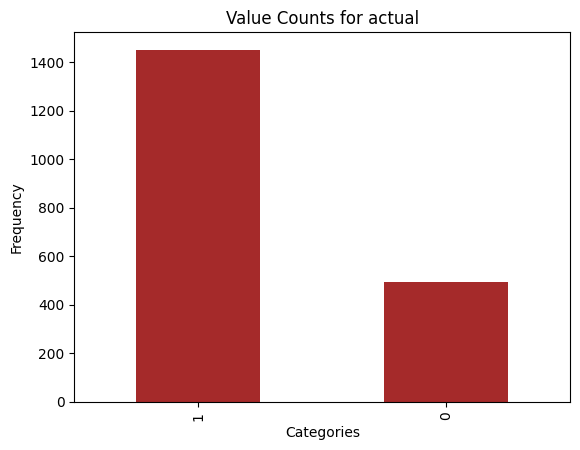



Column: pred
pred
1    1337
0     609
Name: count, dtype: int64


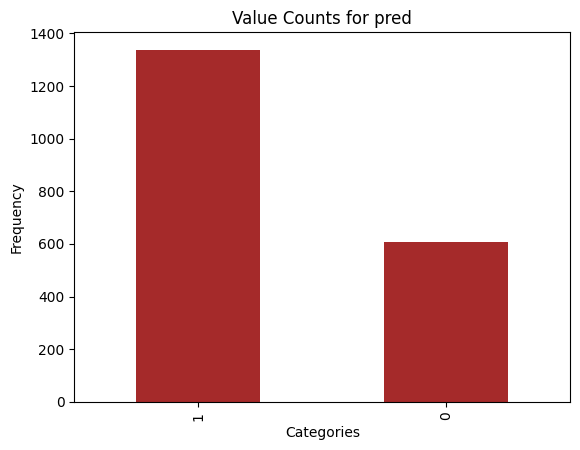



Column: alive
alive
0.998    31
0.760    26
0.988    26
0.813    26
0.796    24
         ..
0.020     1
0.743     1
0.290     1
0.597     1
0.146     1
Name: count, Length: 693, dtype: int64


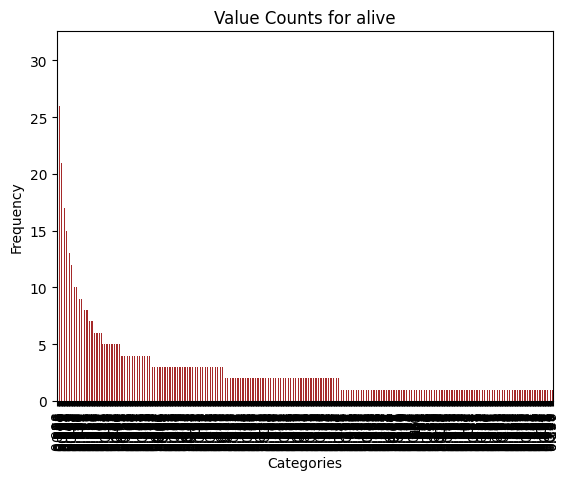



Column: plod
plod
0.002    31
0.240    26
0.012    26
0.187    26
0.204    24
         ..
0.980     1
0.257     1
0.710     1
0.403     1
0.854     1
Name: count, Length: 693, dtype: int64


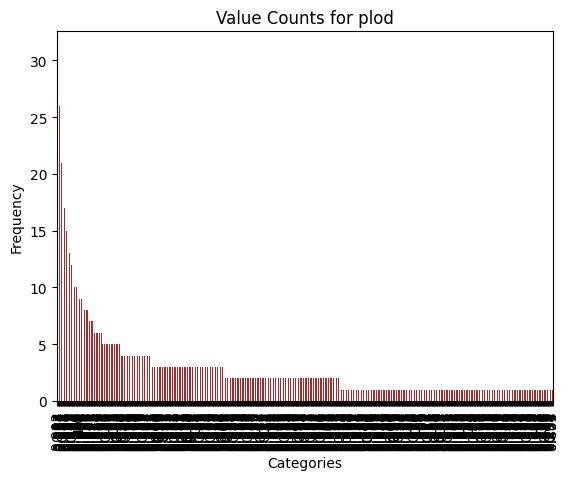



Column: name
name
Viserys II Targaryen        1
Otho Bracken                1
Raymund Frey                1
Raynard Ruttiger            1
Red Alyn of the Rosewood    1
                           ..
Jon Cupps                   1
Jommy                       1
Jommo                       1
Johanna Swann               1
Tytos Lannister             1
Name: count, Length: 1946, dtype: int64


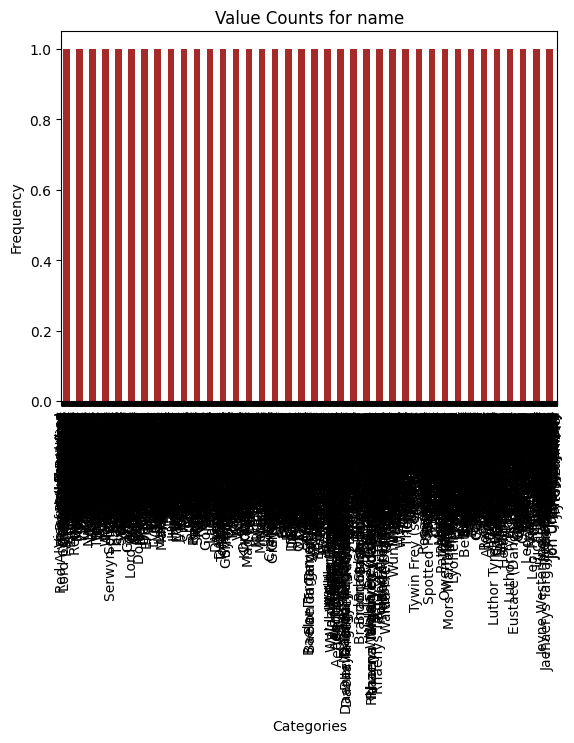



Column: male
male
1    1205
0     741
Name: count, dtype: int64


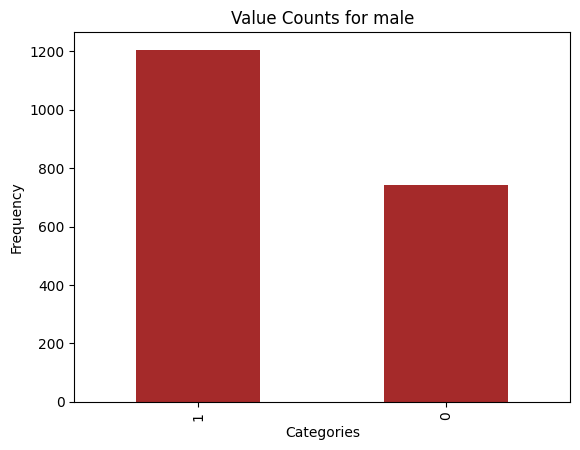



Column: house
house
Night's Watch      105
House Frey          99
House Targaryen     79
House Stark         76
House Lannister     51
                  ... 
House Morne          1
House Frynne         1
House Frenya         1
House Fralegg        1
Three-eyed crow      1
Name: count, Length: 714, dtype: int64


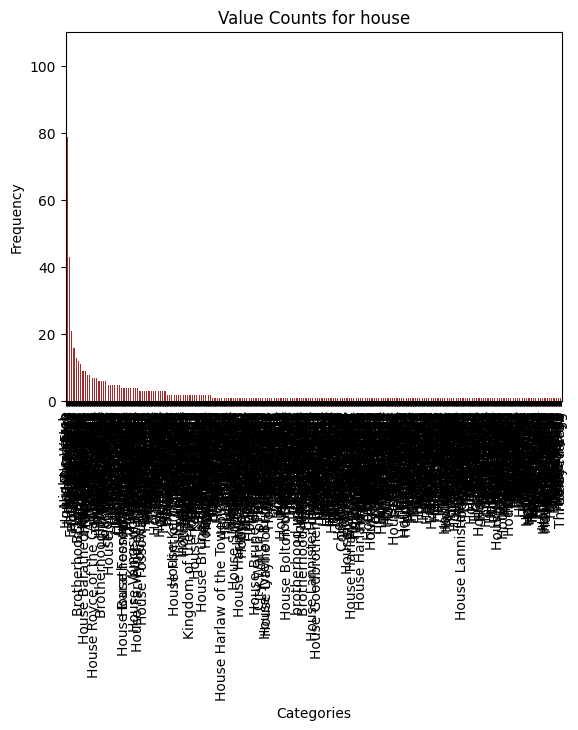



Column: book1
book1
0    1560
1     386
Name: count, dtype: int64


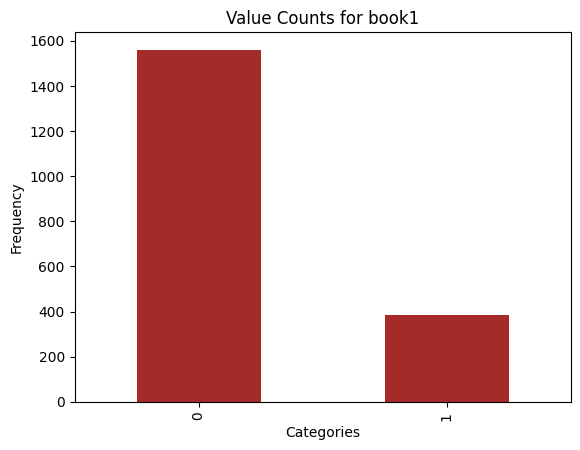



Column: book2
book2
0    1217
1     729
Name: count, dtype: int64


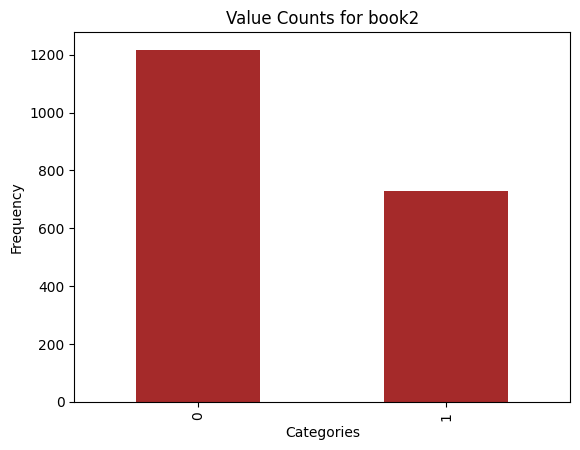



Column: book3
book3
0    1011
1     935
Name: count, dtype: int64


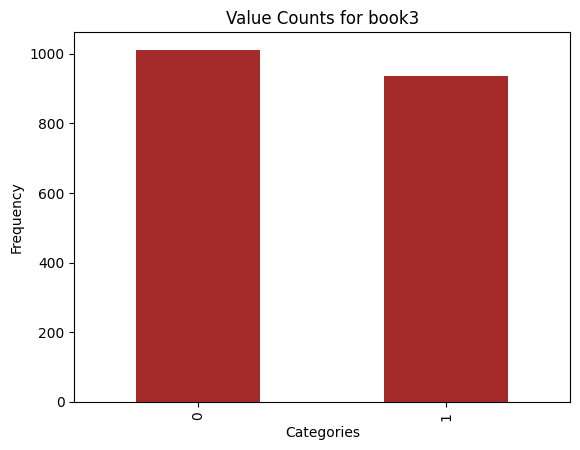



Column: book4
book4
1    1152
0     794
Name: count, dtype: int64


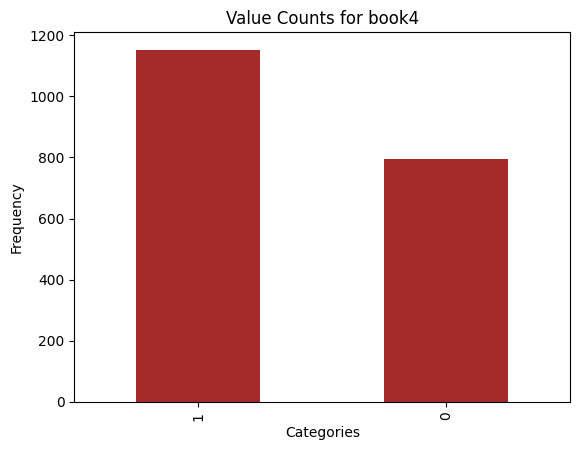



Column: book5
book5
0    1177
1     769
Name: count, dtype: int64


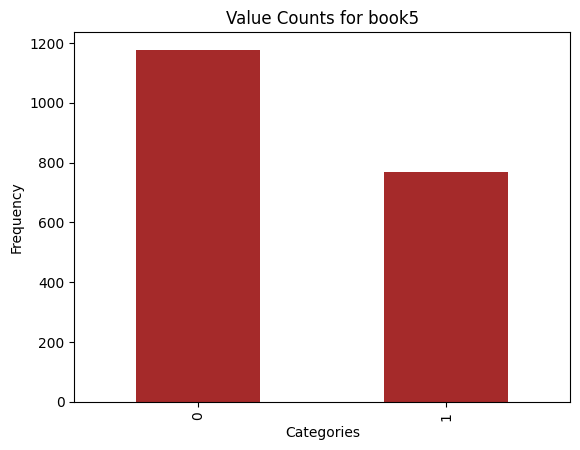



Column: isMarried
isMarried
0    1670
1     276
Name: count, dtype: int64


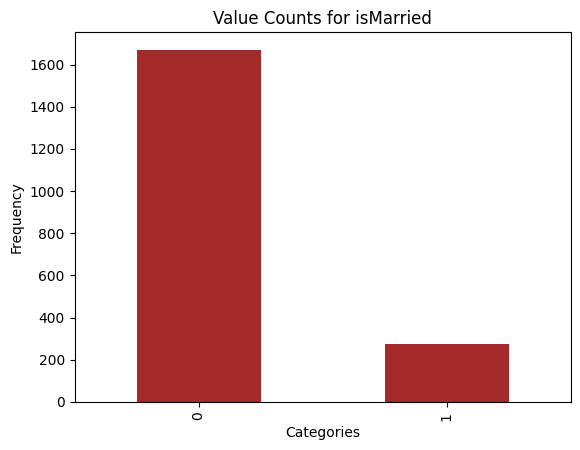



Column: isNoble
isNoble
0    1049
1     897
Name: count, dtype: int64


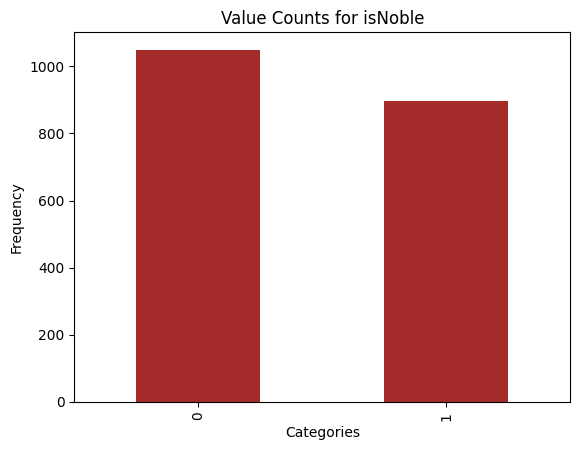



Column: numDeadRelations
numDeadRelations
0     1801
1       49
5       25
4       18
2       12
7       10
6        8
10       5
8        5
3        4
11       3
12       2
15       2
9        2
Name: count, dtype: int64


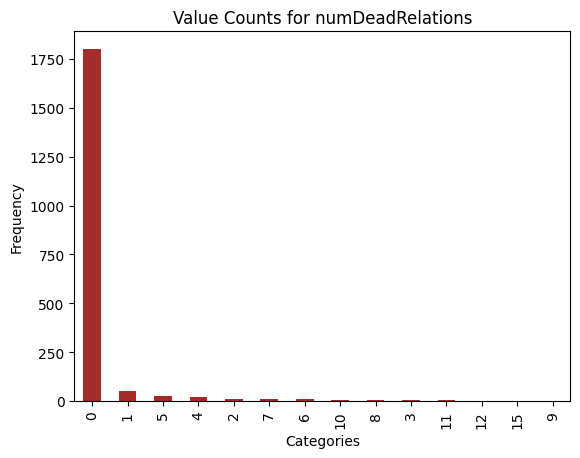



Column: boolDeadRelations
boolDeadRelations
0    1801
1     145
Name: count, dtype: int64


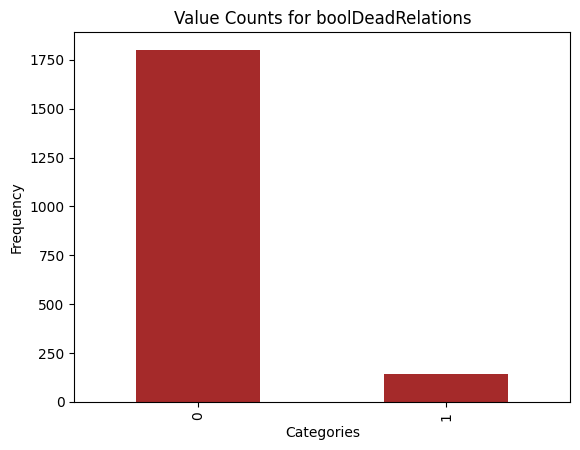



Column: isPopular
isPopular
0    1831
1     115
Name: count, dtype: int64


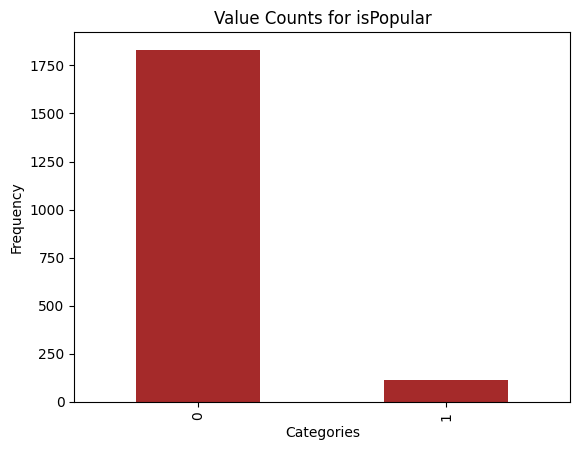



Column: popularity
popularity
0.013378    134
0.016722    124
0.006689    113
0.010033    109
0.020067     90
           ... 
0.772575      1
0.488294      1
0.511706      1
0.638796      1
0.351171      1
Name: count, Length: 166, dtype: int64


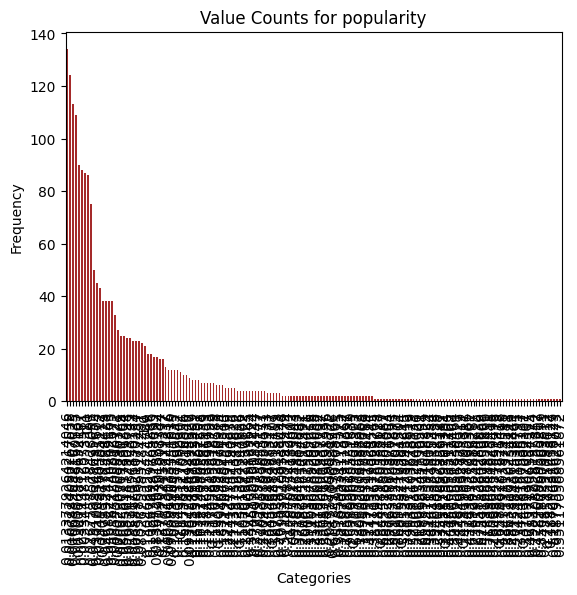



Column: isAlive
isAlive
1    1451
0     495
Name: count, dtype: int64


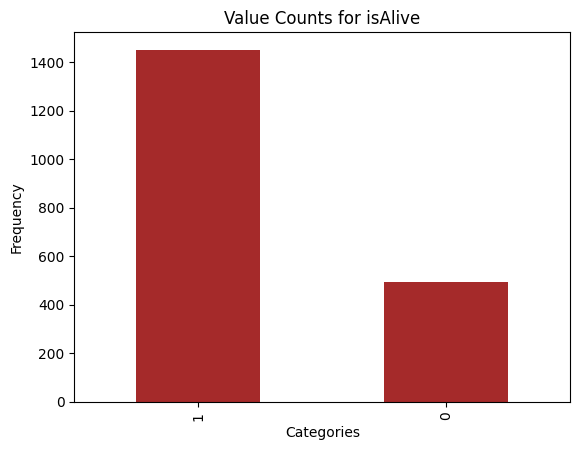

In [21]:
import matplotlib.pyplot as plt 
for i in df.columns:
    print(f"Column: {i}")
    print(df[i].value_counts())
    df[i].value_counts().plot(kind='bar', color='brown')
    plt.title(f"Value Counts for {i}")
    plt.xlabel("Categories")
    plt.ylabel("Frequency")
    # Display the plot
    plt.show()
    print("\n")

In [22]:
len (df['name'].unique())

1946

In [23]:
df = df.drop(columns=['name'])

In [24]:
len (df['house'].unique())

714

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['house'] = label_encoder.fit_transform(df['house'])
df = pd.DataFrame(df)
df.head()

,actual,pred,alive,plod,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,0,0,0.054,0.946,1,583,0,0,0,0,0,0,0,11,1,1,0.605351,0
1,1,0,0.387,0.613,1,228,1,1,1,1,1,1,1,1,1,1,0.896321,1
2,1,0,0.493,0.507,1,576,0,0,0,1,0,0,1,0,0,0,0.267559,1
3,0,0,0.076,0.924,0,55,0,0,0,0,0,1,1,0,0,0,0.183946,0
4,1,1,0.617,0.383,0,535,0,0,0,1,0,1,1,0,0,0,0.043478,1


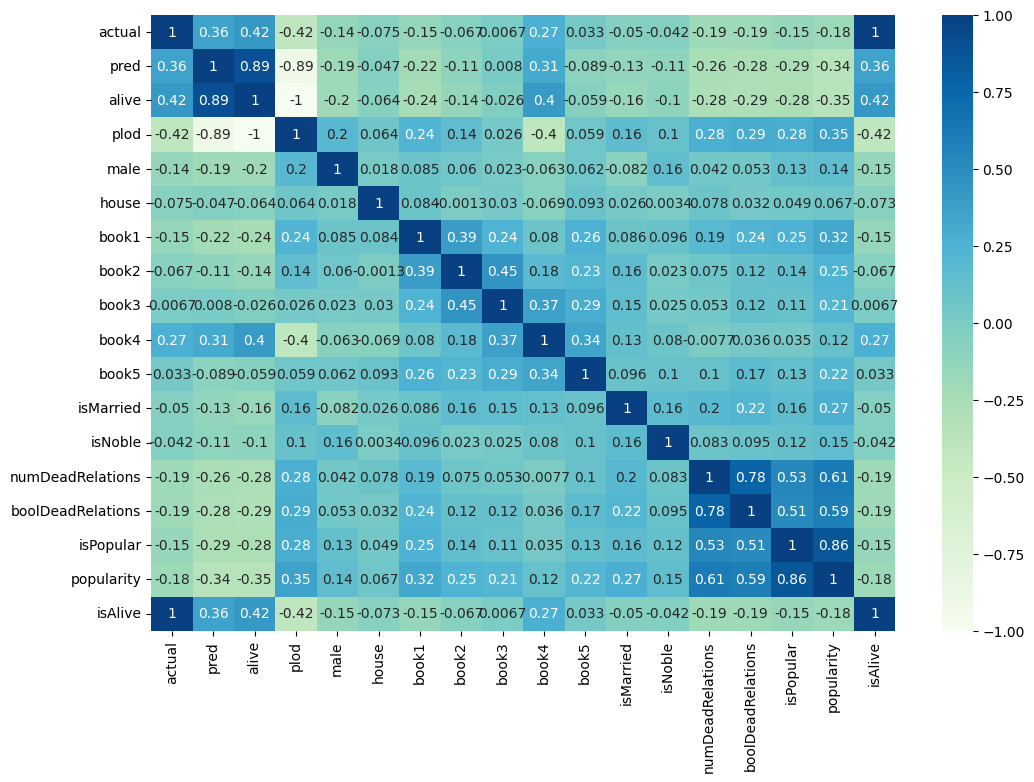

In [26]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='GnBu',annot=True)
plt.show()

In [27]:
df = df.drop(columns=['actual'])

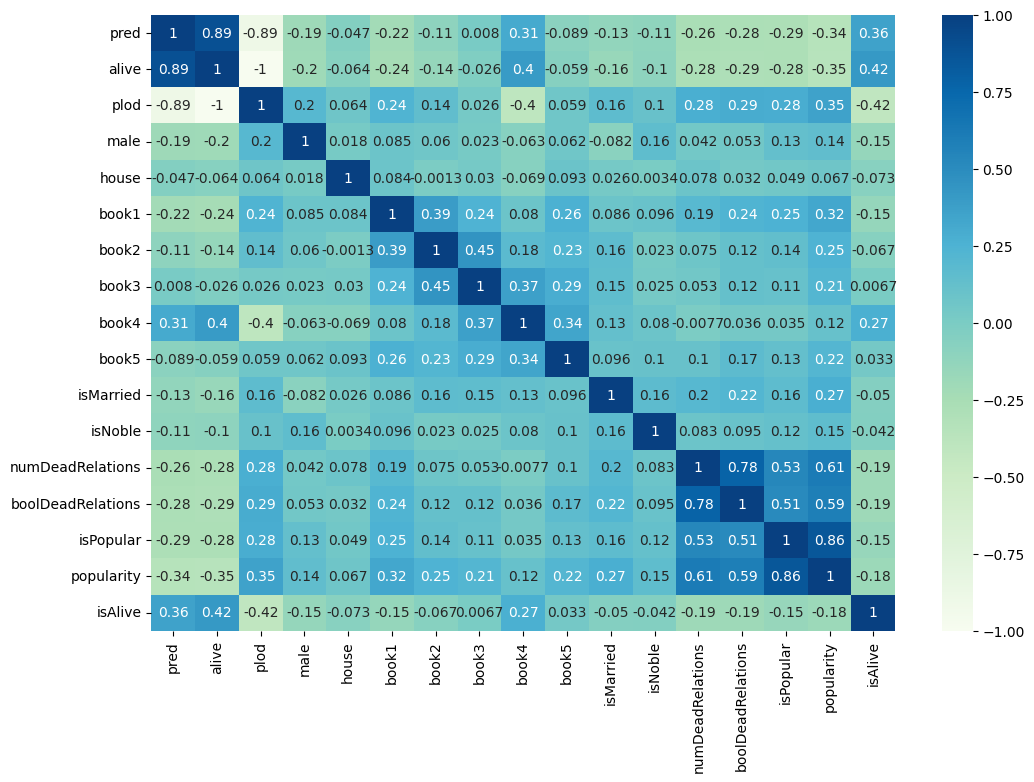

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='GnBu',annot=True)
plt.show()

In [29]:
X = df.drop(['isAlive'], axis=1)

y = df['isAlive']

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_MMScaler=scaler.fit_transform(X)
X_MMScaler = pd.DataFrame(X_MMScaler, columns=X.columns)
X_MMScaler.head()

,pred,alive,plod,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,isPopular,popularity
0,0.0,0.054,0.946,1.0,0.817672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.733333,1.0,1.0,0.605351
1,0.0,0.387,0.613,1.0,0.319776,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.066667,1.0,1.0,0.896321
2,0.0,0.493,0.507,1.0,0.807854,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.267559
3,0.0,0.076,0.924,0.0,0.077139,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.0,0.0,0.183946
4,1.0,0.617,0.383,0.0,0.750351,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.000000,0.0,0.0,0.043478


In [31]:
X_MMScaler.shape

(1946, 16)

In [32]:
def remove_outliers_zscore(X, threshold=3):
    z_scores = np.abs((X - np.mean(X, axis=0)) / np.std(X, axis=0))
    mask = (z_scores < threshold).all(axis=1)
    return X[mask], mask

In [33]:
def remove_outliers_iqr(X):
    Q1 = np.percentile(X, 25, axis=0)
    Q3 = np.percentile(X, 75, axis=0)
    IQR = Q3 - Q1
    mask = ((X >= (Q1 - 1.5 * IQR)) & (X <= (Q3 + 1.5 * IQR))).all(axis=1)
    return X[mask], mask

In [34]:
from sklearn.ensemble import IsolationForest
def remove_outliers_isolation_forest(X):
    iso = IsolationForest(contamination=0.1)
    yhat = iso.fit_predict(X)
    mask = yhat != -1
    return X[mask], mask

In [35]:
from sklearn.neighbors import LocalOutlierFactor
def remove_outliers_lof(X):
    lof = LocalOutlierFactor()
    yhat = lof.fit_predict(X)
    mask = yhat != -1
    return X[mask], mask

In [36]:
from sklearn.covariance import EllipticEnvelope
def remove_outliers_elliptic_envelope(X):
    envelope = EllipticEnvelope(contamination=0.1)
    yhat = envelope.fit_predict(X)
    mask = yhat != -1
    return X[mask], mask


In [37]:
outlier_methods = {
    'Z-Score': remove_outliers_zscore,
    'IQR': remove_outliers_iqr,
    'Isolation Forest': remove_outliers_isolation_forest,
    'LOF': remove_outliers_lof,
    'Elliptic Envelope': remove_outliers_elliptic_envelope
}

In [38]:
result = dict()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
def train_evaluate(X_train, X_test, y_train, y_test, model_name):
    model = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', random_state=42)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=4)
    print(f"\n{model_name} - Train Accuracy: {train_accuracy}\n")
    print(f"\n{model_name} - Accuracy: {accuracy}\n")
    print(f"{model_name} - Classification Report:\n{report}\n")

# Apply outlier detection methods and evaluate the model
for method_name, method_func in outlier_methods.items():
    X_filtered, mask = method_func(X_MMScaler)
    y_filtered = y[mask]
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.25, random_state=42)
    train_evaluate(X_train, X_test, y_train, y_test, method_name)


Z-Score - Train Accuracy: 0.809415337889142


Z-Score - Accuracy: 0.7972665148063781

Z-Score - Classification Report:
              precision    recall  f1-score   support

           0     0.6216    0.2347    0.3407        98
           1     0.8134    0.9589    0.8802       341

    accuracy                         0.7973       439
   macro avg     0.7175    0.5968    0.6105       439
weighted avg     0.7706    0.7973    0.7598       439



IQR - Train Accuracy: 0.8213914849428868


IQR - Accuracy: 0.7950310559006211

IQR - Classification Report:
              precision    recall  f1-score   support

           0     0.5652    0.1884    0.2826        69
           1     0.8127    0.9605    0.8804       253

    accuracy                         0.7950       322
   macro avg     0.6890    0.5744    0.5815       322
weighted avg     0.7597    0.7950    0.7523       322



Isolation Forest - Train Accuracy: 0.8126428027418127


Isolation Forest - Accuracy: 0.8127853881278538

Isolation

In [40]:
from sklearn.svm import SVC
def train_evaluate(X_train, X_test, y_train, y_test, model_name):
    model = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=4)
    print(f"\n{model_name} - Train Accuracy: {train_accuracy}\n")
    print(f"\n{model_name} - Test Accuracy: {accuracy}\n")
    print(f"{model_name} - Classification Report:\n{report}\n")

# Apply outlier detection methods and evaluate the model
for method_name, method_func in outlier_methods.items():
    X_filtered, mask = method_func(X_MMScaler)
    y_filtered = y[mask]
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.25, random_state=42)
    train_evaluate(X_train, X_test, y_train, y_test, method_name)


Z-Score - Train Accuracy: 0.8253606681852695


Z-Score - Test Accuracy: 0.8109339407744874

Z-Score - Classification Report:
              precision    recall  f1-score   support

           0     0.6596    0.3163    0.4276        98
           1     0.8291    0.9531    0.8868       341

    accuracy                         0.8109       439
   macro avg     0.7443    0.6347    0.6572       439
weighted avg     0.7912    0.8109    0.7843       439



IQR - Train Accuracy: 0.8390446521287642


IQR - Test Accuracy: 0.8043478260869565

IQR - Classification Report:
              precision    recall  f1-score   support

           0     0.6500    0.1884    0.2921        69
           1     0.8146    0.9723    0.8865       253

    accuracy                         0.8043       322
   macro avg     0.7323    0.5804    0.5893       322
weighted avg     0.7793    0.8043    0.7591       322



Isolation Forest - Train Accuracy: 0.8264840182648402


Isolation Forest - Test Accuracy: 0.80136986301

In [41]:
from sklearn.linear_model import SGDClassifier
def train_evaluate(X_train, X_test, y_train, y_test, model_name):
    model = SGDClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=4)
    print(f"\n{model_name} - Train Accuracy: {train_accuracy}\n")
    print(f"\n{model_name} - Accuracy: {accuracy}\n")
    print(f"{model_name} - Classification Report:\n{report}\n")

# Apply outlier detection methods and evaluate the model
for method_name, method_func in outlier_methods.items():
    X_filtered, mask = method_func(X_MMScaler)
    y_filtered = y[mask]
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)
    train_evaluate(X_train, X_test, y_train, y_test, method_name)


Z-Score - Train Accuracy: 0.8014646053702197


Z-Score - Accuracy: 0.7912713472485768

Z-Score - Classification Report:
              precision    recall  f1-score   support

           0     0.5769    0.3689    0.4500       122
           1     0.8285    0.9185    0.8712       405

    accuracy                         0.7913       527
   macro avg     0.7027    0.6437    0.6606       527
weighted avg     0.7703    0.7913    0.7737       527



IQR - Train Accuracy: 0.8242491657397107


IQR - Accuracy: 0.7953367875647669

IQR - Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.0247    0.0482        81
           1     0.7943    1.0000    0.8853       305

    accuracy                         0.7953       386
   macro avg     0.8971    0.5123    0.4668       386
weighted avg     0.8374    0.7953    0.7097       386



Isolation Forest - Train Accuracy: 0.7918367346938775


Isolation Forest - Accuracy: 0.8098859315589354

Isolatio

In [42]:
from sklearn.ensemble import RandomForestClassifier
def train_evaluate(X_train, X_test, y_train, y_test, model_name):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=4)
    print(f"\n{model_name} - Train Accuracy: {train_accuracy}\n")
    print(f"\n{model_name} - Test Accuracy: {accuracy}\n")
    print(f"{model_name} - Classification Report:\n{report}\n")
    result[model_name]=accuracy
# Apply outlier detection methods and evaluate the model
for method_name, method_func in outlier_methods.items():
    X_filtered, mask = method_func(X_MMScaler)
    y_filtered = y[mask]
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)
    train_evaluate(X_filtered, X_test, y_filtered, y_test, method_name)


Z-Score - Train Accuracy: 0.9988610478359908


Z-Score - Test Accuracy: 0.9981024667931688

Z-Score - Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9918    0.9959       122
           1     0.9975    1.0000    0.9988       405

    accuracy                         0.9981       527
   macro avg     0.9988    0.9959    0.9973       527
weighted avg     0.9981    0.9981    0.9981       527



IQR - Train Accuracy: 0.998443579766537


IQR - Test Accuracy: 0.9974093264248705

IQR - Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9877    0.9938        81
           1     0.9967    1.0000    0.9984       305

    accuracy                         0.9974       386
   macro avg     0.9984    0.9938    0.9961       386
weighted avg     0.9974    0.9974    0.9974       386



Isolation Forest - Train Accuracy: 0.9988577955454027


Isolation Forest - Test Accuracy: 1.0

Isolation

In [43]:
from xgboost import XGBClassifier
def train_evaluate(X_train, X_test, y_train, y_test, model_name):
    model = XGBClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=4)
    print(f"\n{model_name} - Train Accuracy: {train_accuracy}\n")
    print(f"\n{model_name} - Test Accuracy: {accuracy}\n")
    print(f"{model_name} - Classification Report:\n{report}\n")
    result[model_name]=accuracy
# Apply outlier detection methods and evaluate the model
for method_name, method_func in outlier_methods.items():
    X_filtered, mask = method_func(X_MMScaler)
    y_filtered = y[mask]
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)
    train_evaluate(X_filtered, X_test, y_filtered, y_test, method_name)


Z-Score - Train Accuracy: 0.9914578587699316


Z-Score - Test Accuracy: 0.9924098671726755

Z-Score - Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9672    0.9833       122
           1     0.9902    1.0000    0.9951       405

    accuracy                         0.9924       527
   macro avg     0.9951    0.9836    0.9892       527
weighted avg     0.9925    0.9924    0.9924       527



IQR - Train Accuracy: 0.9976653696498055


IQR - Test Accuracy: 0.9948186528497409

IQR - Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9753    0.9875        81
           1     0.9935    1.0000    0.9967       305

    accuracy                         0.9948       386
   macro avg     0.9967    0.9877    0.9921       386
weighted avg     0.9949    0.9948    0.9948       386



Isolation Forest - Train Accuracy: 0.9931467732724157


Isolation Forest - Test Accuracy: 0.99429657794

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
def train_evaluate(X_train, X_test, y_train, y_test, model_name):
    model = GradientBoostingClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=4)
    print(f"\n{model_name} - Train Accuracy: {train_accuracy}\n")
    print(f"\n{model_name} - Test Accuracy: {accuracy}\n")
    print(f"{model_name} - Classification Report:\n{report}\n")
    result[model_name]=accuracy
# Apply outlier detection methods and evaluate the model
for method_name, method_func in outlier_methods.items():
    X_filtered, mask = method_func(X_MMScaler)
    y_filtered = y[mask]
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)
    train_evaluate(X_filtered, X_test, y_filtered, y_test, method_name)


Z-Score - Train Accuracy: 0.8593394077448747


Z-Score - Test Accuracy: 0.857685009487666

Z-Score - Classification Report:
              precision    recall  f1-score   support

           0     0.8730    0.4508    0.5946       122
           1     0.8556    0.9802    0.9137       405

    accuracy                         0.8577       527
   macro avg     0.8643    0.7155    0.7541       527
weighted avg     0.8596    0.8577    0.8398       527



IQR - Train Accuracy: 0.8910505836575876


IQR - Test Accuracy: 0.8963730569948186

IQR - Classification Report:
              precision    recall  f1-score   support

           0     0.9767    0.5185    0.6774        81
           1     0.8863    0.9967    0.9383       305

    accuracy                         0.8964       386
   macro avg     0.9315    0.7576    0.8078       386
weighted avg     0.9053    0.8964    0.8835       386



Isolation Forest - Train Accuracy: 0.8629354654483152


Isolation Forest - Test Accuracy: 0.853612167300

In [45]:
from sklearn.ensemble import AdaBoostClassifier
def train_evaluate(X_train, X_test, y_train, y_test, model_name):
    model = AdaBoostClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=4)
    print(f"\n{model_name} - Train Accuracy: {train_accuracy}\n")
    print(f"\n{model_name} - Test Accuracy: {accuracy}\n")
    print(f"{model_name} - Classification Report:\n{report}\n")
    result[model_name]=accuracy
# Apply outlier detection methods and evaluate the model
for method_name, method_func in outlier_methods.items():
    X_filtered, mask = method_func(X_MMScaler)
    y_filtered = y[mask]
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)
    train_evaluate(X_filtered, X_test, y_filtered, y_test, method_name)


Z-Score - Train Accuracy: 0.8257403189066059


Z-Score - Test Accuracy: 0.8197343453510436

Z-Score - Classification Report:
              precision    recall  f1-score   support

           0     0.7015    0.3852    0.4974       122
           1     0.8370    0.9506    0.8902       405

    accuracy                         0.8197       527
   macro avg     0.7692    0.6679    0.6938       527
weighted avg     0.8056    0.8197    0.7992       527



IQR - Train Accuracy: 0.8459143968871595


IQR - Test Accuracy: 0.8419689119170984

IQR - Classification Report:
              precision    recall  f1-score   support

           0     0.8333    0.3086    0.4505        81
           1     0.8427    0.9836    0.9077       305

    accuracy                         0.8420       386
   macro avg     0.8380    0.6461    0.6791       386
weighted avg     0.8407    0.8420    0.8118       386



Isolation Forest - Train Accuracy: 0.817818389491719


Isolation Forest - Test Accuracy: 0.800380228136